In [1]:
import cProfile, pstats, io

def profile(fnc):
    """A decorator that uses cProfile to profile a function"""
    def inner(*args, **kwargs):
        
        pr = cProfile.Profile()
        pr.enable()
        retval = fnc(*args, **kwargs)
        pr.disable()
        s = io.StringIO()
        sortby = 'cumulative'
        ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
        ps.print_stats()
        print(s.getvalue())
        return retval

    return inner

In [2]:
import time
import multiprocessing as mp

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

import hphc4

C = 299792458.
G = 6.67408*1e-11
Mo = 1.989*1e30
Mpc = 3.086*1e22

In [3]:
@profile
def hf(freq):
    N = len(freq)
    h_plus = np.zeros(N)
    zz = 0
    for z in freq:
        arg_plus = {'iota_':np.pi/3, 'beta_':np.pi/3, 'D_':100. , 'm1_':10., 'm2_':10., 'f_':z, 'f0_':20., 'Fp_':1.0, 'Fc_':0.0, 'et0_':0.1, 'phic_':0., 'tc_':0.}
        fplus = hphc4.Fn(**arg_plus)
        
        h_plus[zz] = abs(fplus.htilde())
        zz = zz+1
        
    return(h_plus)

In [4]:
hf([215])

         17636709 function calls (17616185 primitive calls) in 12.061 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   12.061   12.061 <ipython-input-3-8dc7350b079a>:1(hf)
        1    0.000    0.000   12.061   12.061 /home/hemantakumar.phurailatpam/bilby/0PN/hphc4.py:408(htilde)
    60896    0.130    0.000    9.972    0.000 /home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/sympy/core/decorators.py:255(_func)
        1    0.001    0.001    9.144    9.144 /home/hemantakumar.phurailatpam/bilby/0PN/hphc4.py:369(htilde1)
    60896    0.077    0.000    8.492    0.000 /home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/sympy/core/decorators.py:130(binary_op_wrapper)
162808/160824    0.302    0.000    8.395    0.000 /home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/sympy/core/cache.py:69(wrapper)
    36388    0

array([4.78691127e-24])

In [36]:
import time
import multiprocessing

In [8]:
def hf2(freq):
    N = len(freq)
    h_plus = np.zeros(N)
    zz = 0
    for z in freq:
        arg_plus = {'iota_':np.pi/3, 'beta_':np.pi/3, 'D_':100. , 'm1_':10., 'm2_':10., 'f_':z, 'f0_':20., 'Fp_':1.0, 'Fc_':0.0, 'et0_':0.1, 'phic_':0., 'tc_':0.}
        fplus = hphc4.Fn(**arg_plus)
        
        h_plus[zz] = abs(fplus.htilde())
        zz = zz+1
        
    return(h_plus)

In [20]:
'''
def multi(frequency_):
    frequency_ = np.array(frequency_)
    #number of frequency each core will handle
    div = np.array(np.divmod(len(frequency_),cores))
    h_plus_ = np.zeros(cores,object)
    
    for ii in range(cores):
        array_start = ii*div[0]
        array_stop = array_start + div[0]
        if ii == cores-1:
            array_stop = array_stop + div[1]
        frequency_array = frequency_[array_start:array_stop]
        h_plus_[ii] = hf2(frequency_array) 
        
    return(h_plus_)
'''
def multi(frequency_):
    
    frequency_ = np.array(frequency_)
    #number of frequency each core will handle
    div = np.array(np.divmod(len(frequency_),cores))
    h_plus_ = np.zeros(cores,object)
    
    frequency_array = []
    result_ = []
    for ii in range(cores):
        #declaring frequency array start and stop point
        array_start = ii*div[0]
        array_stop = array_start + div[0]
        if ii == cores-1:
            array_stop = array_stop + div[1]
            
        frequency_array.append(frequency_[array_start:array_stop])
        #h_plus_[ii] = hf2(frequency_array) 
        
    with mp.Pool(processes=cores) as pool:
        result_ = pool.map(hf2, frequency_array)   
        
    return(result)

In [21]:
cores = 32
t0 = time.time()
ee = multi(test_array)
t1 = time.time()
print('Execution took {:.4f}'.format(t1 - t0))
print(ee)

Execution took 68.7259
[array([1.01923136e-22]), array([7.73831938e-23]), array([4.30238214e-23]), array([4.35123465e-23]), array([3.30099442e-23]), array([3.3032459e-23]), array([2.39028874e-23]), array([2.94726349e-23]), array([2.13246907e-23]), array([2.0983938e-23]), array([1.93733766e-23]), array([1.68677995e-23]), array([1.63672848e-23]), array([1.48759875e-23]), array([1.37345772e-23]), array([1.40046981e-23]), array([1.19071943e-23]), array([1.232781e-23]), array([1.05067557e-23]), array([1.03990252e-23]), array([1.07318831e-23]), array([9.63915e-24]), array([8.68740226e-24]), array([8.49522706e-24]), array([8.76351223e-24]), array([8.5366633e-24]), array([7.65907969e-24]), array([7.54771781e-24]), array([6.93249068e-24]), array([6.52395615e-24]), array([6.22647094e-24]), array([6.17387880e-24, 5.65939482e-24, 6.01071999e-24, 5.63323280e-24,
       5.30956274e-24, 5.55693598e-24, 5.40476719e-24, 4.94804415e-24,
       4.78691127e-24])]


In [23]:
ee[1]

array([7.73831938e-23])

In [27]:
def hf3(freq):

    arg_plus = {'iota_':np.pi/3, 'beta_':np.pi/3, 'D_':100. , 'm1_':10., 'm2_':10., 'f_':freq, 'f0_':20., 'Fp_':1.0, 'Fc_':0.0, 'et0_':0.1, 'phic_':0., 'tc_':0.}
    fplus = hphc4.Fn(**arg_plus)

    h_plus = abs(fplus.htilde())

        
    return(h_plus)

In [28]:
result = []
t0 = time.time()
with mp.Pool(processes=32) as pool:
    result = pool.map(hf3, test_array)
t1 = time.time()
print('Execution took {:.4f}'.format(t1 - t0))
print(result)

Execution took 25.9355
[1.0192313648344236e-22, 7.738319383251714e-23, 4.3023821356445706e-23, 4.351234646852694e-23, 3.300994416093859e-23, 3.3032458987460667e-23, 2.3902887352325758e-23, 2.947263489540225e-23, 2.1324690694354982e-23, 2.0983937958457505e-23, 1.9373376554692873e-23, 1.686779954244985e-23, 1.636728482590296e-23, 1.4875987453505207e-23, 1.3734577249959598e-23, 1.4004698071665277e-23, 1.1907194300533693e-23, 1.2327809952165748e-23, 1.0506755713680582e-23, 1.0399025153255574e-23, 1.073188307271881e-23, 9.639149996519937e-24, 8.687402262803257e-24, 8.49522706436776e-24, 8.76351222904602e-24, 8.536663301480596e-24, 7.659079693693365e-24, 7.547717813466042e-24, 6.932490680993183e-24, 6.523956154419118e-24, 6.226470941468745e-24, 6.1738787970701104e-24, 5.659394822334997e-24, 6.0107199890949206e-24, 5.6332327990662525e-24, 5.3095627395208505e-24, 5.5569359792698424e-24, 5.4047671855361916e-24, 4.948044154859264e-24, 4.7869112691847975e-24]


In [29]:
np.array(result)-np.array(test_result)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [25]:
#et.astype('float64')
h_plus_test = np.zeros(4,object)
h_plus_test[0] = np.array([1,2,3])
dd = np.array(h_plus_test[0].astype(np.float))
print(dd[1])

2.0


In [35]:
dd

array([1., 2., 3.])

In [6]:
#to find fmax
(C**3)/( G*(10.0+10.0)*Mo*np.pi*6**(3/2) )

219.80075184694996

In [27]:
aa=np.array([1,2,3])
bb=np.array([4,5,6])
cc=np.array([7,8])
np.hstack((aa,bb,cc))

array([1, 2, 3, 4, 5, 6, 7, 8])

In [26]:
np.array(np.arange(20,220,5))

array([ 20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,  75,  80,
        85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145,
       150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210,
       215])

In [17]:
test_array = np.arange(20,220,5)

In [18]:
t0 = time.time()
test_result = hf2(test_array)
t1 = time.time()
print('Execution took {:.4f}'.format(t1 - t0))
print(test_result)

Execution took 369.3626
[1.01923136e-22 7.73831938e-23 4.30238214e-23 4.35123465e-23
 3.30099442e-23 3.30324590e-23 2.39028874e-23 2.94726349e-23
 2.13246907e-23 2.09839380e-23 1.93733766e-23 1.68677995e-23
 1.63672848e-23 1.48759875e-23 1.37345772e-23 1.40046981e-23
 1.19071943e-23 1.23278100e-23 1.05067557e-23 1.03990252e-23
 1.07318831e-23 9.63915000e-24 8.68740226e-24 8.49522706e-24
 8.76351223e-24 8.53666330e-24 7.65907969e-24 7.54771781e-24
 6.93249068e-24 6.52395615e-24 6.22647094e-24 6.17387880e-24
 5.65939482e-24 6.01071999e-24 5.63323280e-24 5.30956274e-24
 5.55693598e-24 5.40476719e-24 4.94804415e-24 4.78691127e-24]


In [10]:
array = np.array([1.01923136e-22, 7.73831938e-23, 4.30238214e-23, 4.35123465e-23,
       3.30099442e-23, 3.30324590e-23, 2.39028874e-23, 2.94726349e-23,
       2.13246907e-23, 2.09839380e-23, 1.93733766e-23, 1.68677995e-23,
       1.63672848e-23, 1.48759875e-23, 1.37345772e-23, 1.40046981e-23,
       1.19071943e-23, 1.23278100e-23, 1.05067557e-23, 1.03990252e-23,
       1.07318831e-23, 9.63915000e-24, 8.68740226e-24, 8.49522706e-24,
       8.76351223e-24, 8.53666330e-24, 7.65907969e-24, 7.54771781e-24,
       6.93249068e-24, 6.52395615e-24, 6.22647094e-24, 6.17387880e-24,
       5.65939482e-24, 6.01071999e-24, 5.63323280e-24, 5.30956274e-24,
       5.55693598e-24, 5.40476719e-24, 4.94804415e-24, 4.78691127e-24])

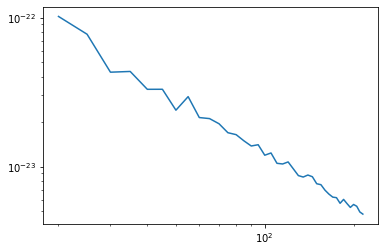

In [11]:
plt.loglog(frequency_array,array)